# Bike Sharing Assignment

### Problem statement
- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands

## Reading and Understanding the Data

In [1]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# Importing the dataset
bike_sharing_df = pd.read_csv('day.csv')

In [3]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing_df.shape

(730, 16)

In [5]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing_df['dteday'] = pd.to_datetime(bike_sharing_df['dteday'], dayfirst=True)

In [7]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

## Dropping casual and registered column since the target variable cnt is derived from this 2 variables

In [8]:
bike_sharing_df = bike_sharing_df.drop(['casual', 'registered'], axis=1)

In [9]:
bike_sharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Standardizing Categorical variable from numeral to String

In [10]:
bike_sharing_df['season'] = bike_sharing_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [11]:
bike_sharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike_sharing_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
bike_sharing_df['mnth'] = bike_sharing_df['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11: 'November', 12:'December'})

In [14]:
bike_sharing_df['mnth'].value_counts()

May          62
October      62
January      62
March        62
July         62
August       62
December     62
June         60
November     60
September    60
April        60
February     56
Name: mnth, dtype: int64

In [15]:
# The values of weathersit converted with following keywords
# Clear: Clear, Few clouds, Partly cloudy, Partly cloudy
# Mist : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# Light : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# Heavy : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light', 4:'Heavy'})

In [16]:
bike_sharing_df['weathersit'].value_counts()

Clear    463
Mist     246
Light     21
Name: weathersit, dtype: int64

In [17]:
bike_sharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,January,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,spring,0,January,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,spring,0,January,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,spring,0,January,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,spring,0,January,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
bike_sharing_df.describe()

,instant,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,0.500343,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,0.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,0.500000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,1.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,1.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [19]:
bike_sharing_df['weekday'] = bike_sharing_df['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

In [20]:
bike_sharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
bike_sharing_df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [22]:
bike_sharing_df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

## Visualising the Data

<Figure size 1800x1080 with 0 Axes>

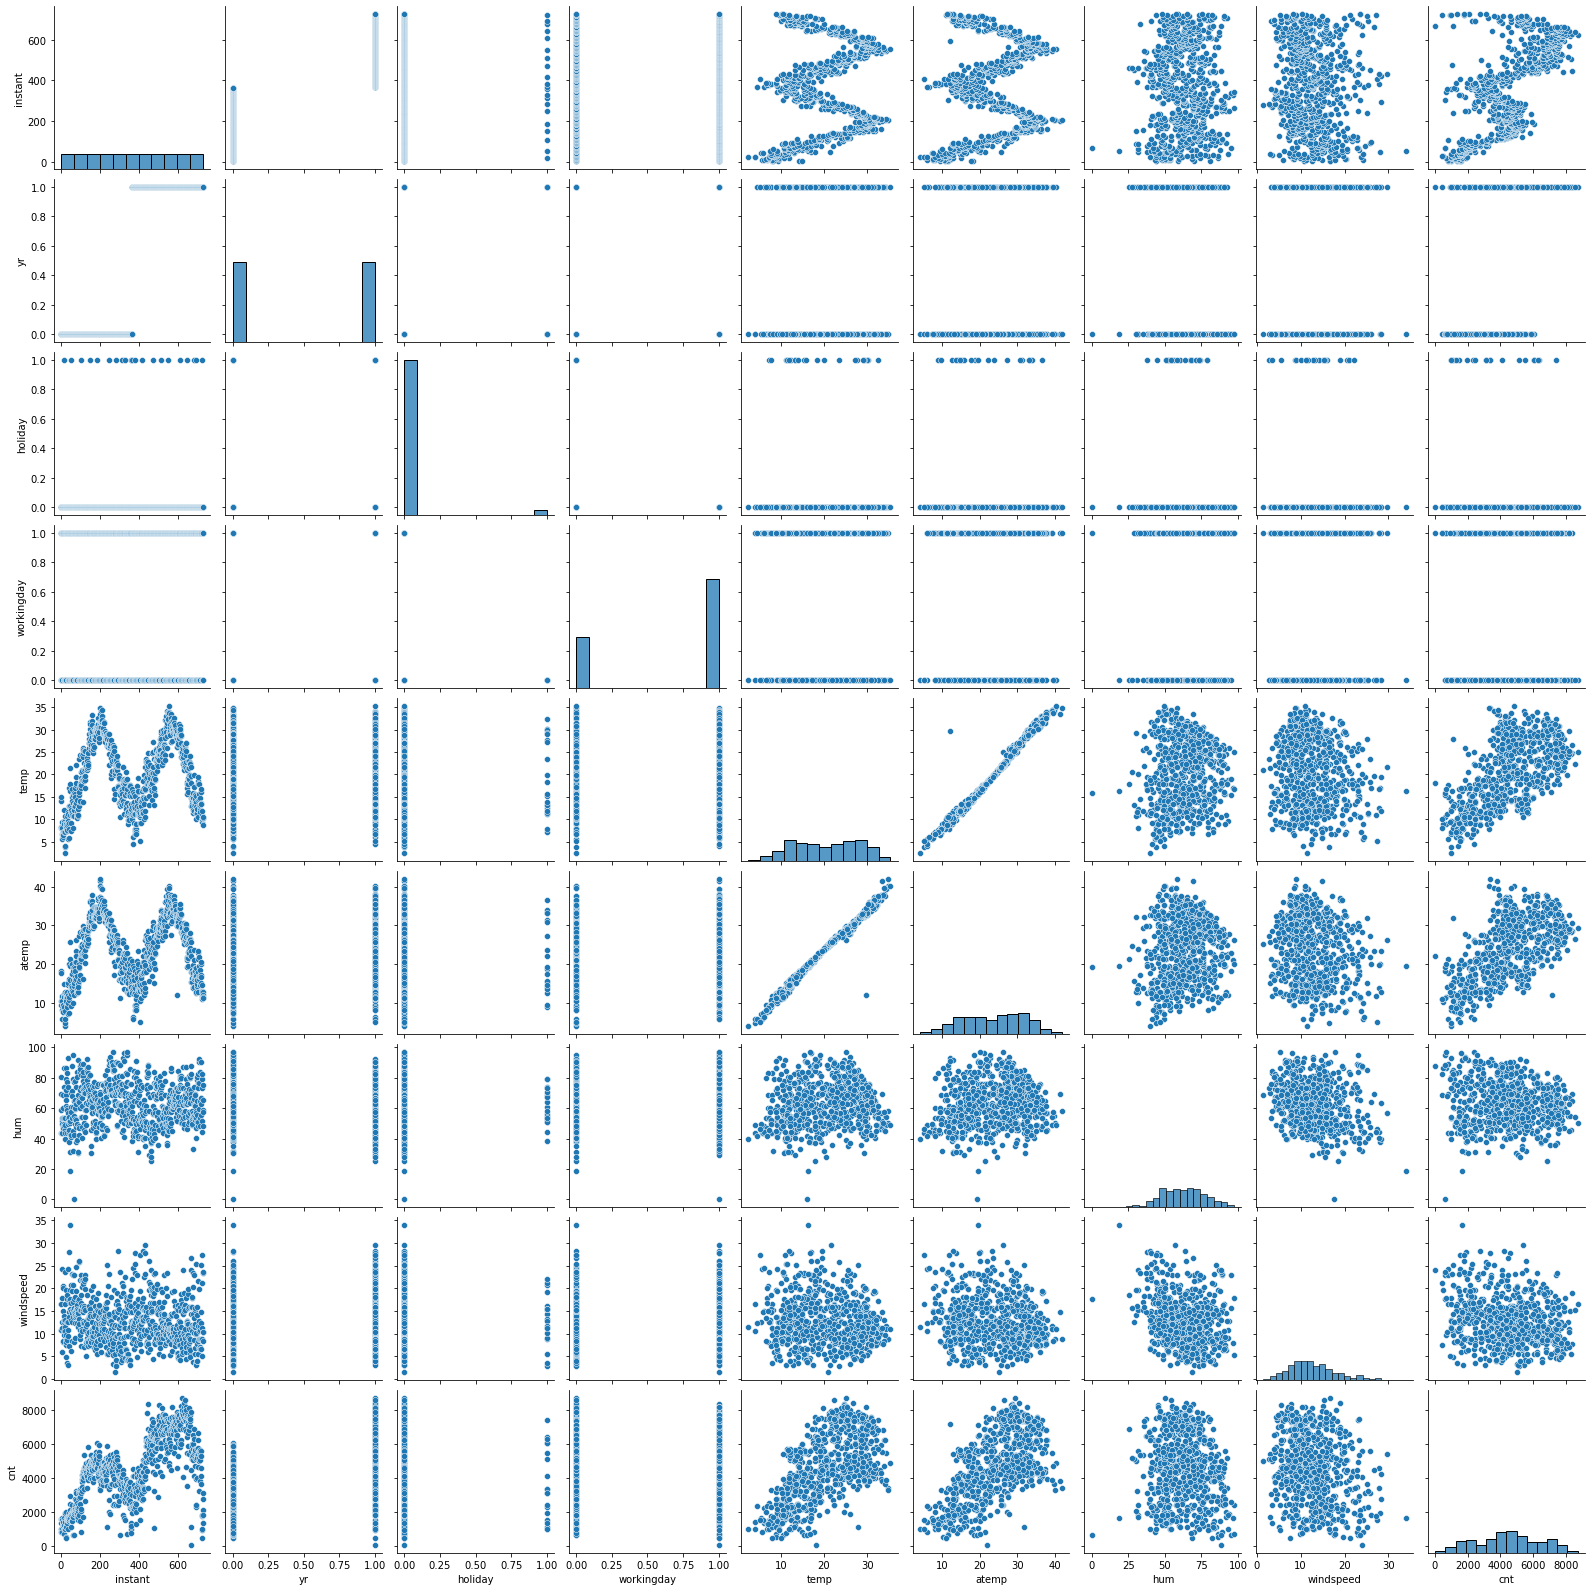

In [23]:
# Visualize the continuous variables
plt.figure(figsize=(25,15))
sns.pairplot(bike_sharing_df)
plt.show()

In [24]:
bike_sharing_df.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [25]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 80.0+ KB


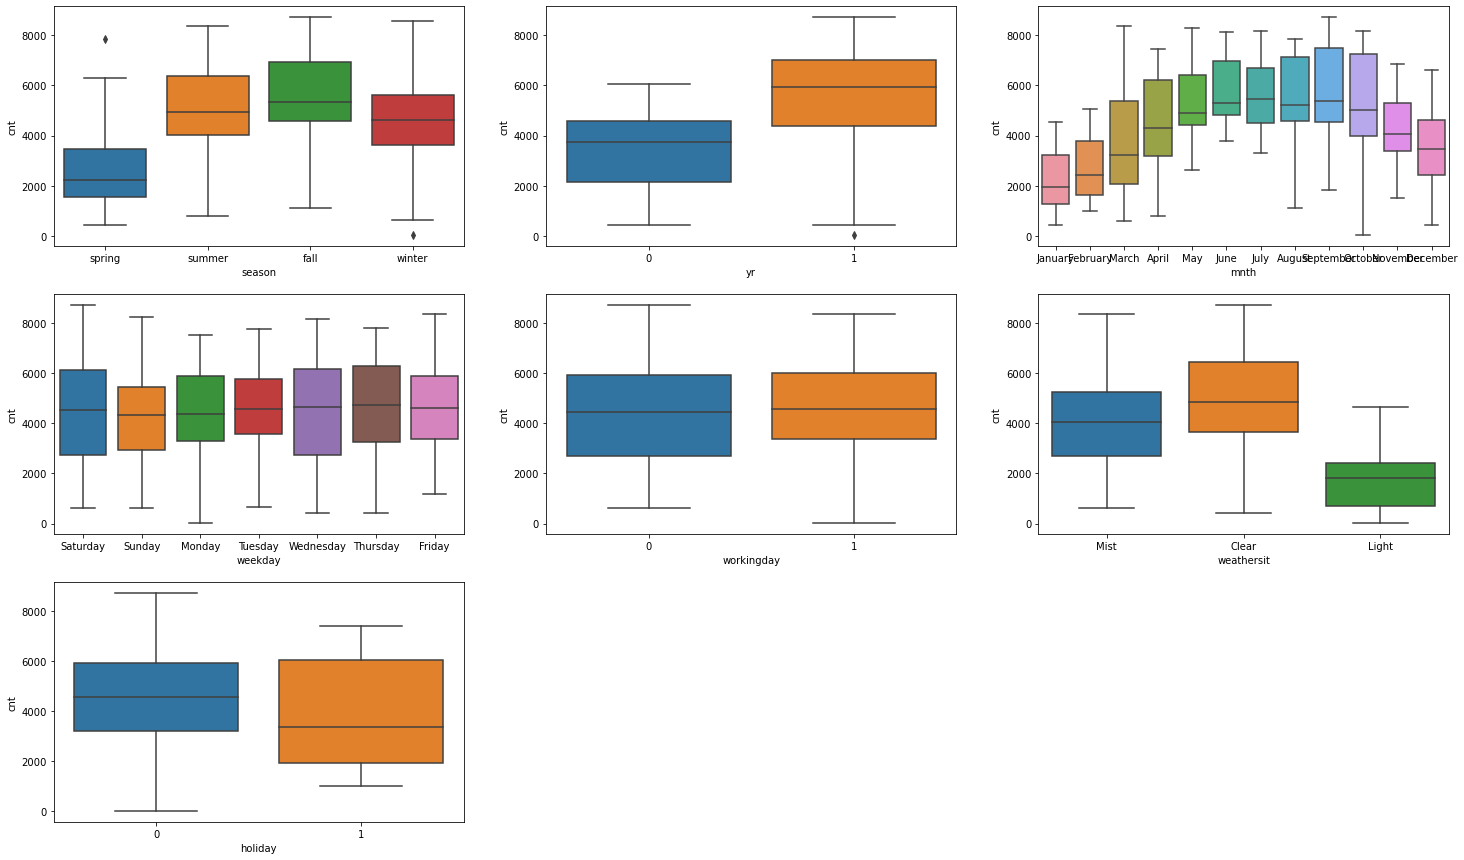

In [26]:
# Visualizing the Categorical variable using box plot
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike_sharing_df)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bike_sharing_df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike_sharing_df)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing_df)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing_df)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing_df)
plt.subplot(3,3,7)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing_df)

plt.show()

## Inferences from the Categorical and Continuos variable analysis
- As the temperature increased clearly the total rental count is increasing
- During spring bike rental count is clearly decreased than rest of the reason.
- On year to year, the overall count is increasing
- When the weather is clear, majority of the data cnt above the others.

## Data Preparation

In [27]:
## Creating dummay variable for all categorical Variables
status = pd.get_dummies(bike_sharing_df[['season', 'mnth', 'weekday']], drop_first=True)
status.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
# Concatenating dummy dataset with bike sharing dataset
bike_sharing_df = pd.concat([bike_sharing_df, status], axis=1)
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,2018-01-01,spring,0,January,0,Saturday,0,Mist,14.110847,...,0,0,0,0,0,1,0,0,0,0
1,2,2018-01-02,spring,0,January,0,Sunday,0,Mist,14.902598,...,0,0,0,0,0,0,1,0,0,0
2,3,2018-01-03,spring,0,January,0,Monday,1,Clear,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,2018-01-04,spring,0,January,0,Tuesday,1,Clear,8.200000,...,0,0,0,0,0,0,0,0,1,0
4,5,2018-01-05,spring,0,January,0,Wednesday,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,1


In [29]:
## for weathersit variable we are not dropping the first dummy since the data category had 3 instead of 4 category.
status_2 = pd.get_dummies(bike_sharing_df['weathersit'])

In [30]:
# Concatenating dummy dataset with housing dataset
bike_sharing_df = pd.concat([bike_sharing_df, status_2], axis=1)
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
0,1,2018-01-01,spring,0,January,0,Saturday,0,Mist,14.110847,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-01-02,spring,0,January,0,Sunday,0,Mist,14.902598,...,0,0,0,1,0,0,0,0,0,1
2,3,2018-01-03,spring,0,January,0,Monday,1,Clear,8.050924,...,0,1,0,0,0,0,0,1,0,0
3,4,2018-01-04,spring,0,January,0,Tuesday,1,Clear,8.200000,...,0,0,0,0,0,1,0,1,0,0
4,5,2018-01-05,spring,0,January,0,Wednesday,1,Clear,9.305237,...,0,0,0,0,0,0,1,1,0,0


In [31]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            730 non-null    int64         
 1   dteday             730 non-null    datetime64[ns]
 2   season             730 non-null    object        
 3   yr                 730 non-null    int64         
 4   mnth               730 non-null    object        
 5   holiday            730 non-null    int64         
 6   weekday            730 non-null    object        
 7   workingday         730 non-null    int64         
 8   weathersit         730 non-null    object        
 9   temp               730 non-null    float64       
 10  atemp              730 non-null    float64       
 11  hum                730 non-null    float64       
 12  windspeed          730 non-null    float64       
 13  cnt                730 non-null    int64         
 14  season_spr

In [32]:
# Dropping the original categorical variable since the dummy variables are created
bike_sharing_df = bike_sharing_df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
bike_sharing_df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,1,0,0,0,0,0,1
2,3,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,1,0,0,0,0,0,1,0,0
3,4,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,1,0,0
4,5,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,1,1,0,0


<Figure size 1440x648 with 0 Axes>

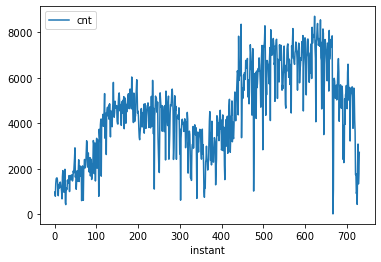

In [33]:
# days vs count
plt.figure(figsize=(20,9))
bike_sharing_df.plot.line(x='instant', y='cnt')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


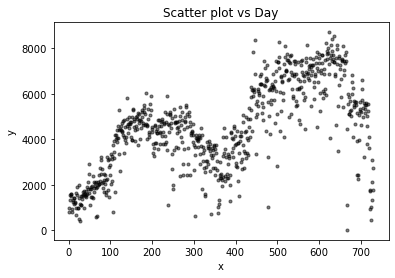

In [34]:
# Scatter Plot (days vs count)
colors = (0,0,0)
area = np.pi*3
plt.scatter(bike_sharing_df.instant, bike_sharing_df.cnt, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot vs Day')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Dropping instant and dteday since all the variable that can be derived from them are already available

In [35]:
bike_sharing_df = bike_sharing_df.drop(['instant', 'dteday'], axis=1)
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


In [36]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   season_spring      730 non-null    uint8  
 9   season_summer      730 non-null    uint8  
 10  season_winter      730 non-null    uint8  
 11  mnth_August        730 non-null    uint8  
 12  mnth_December      730 non-null    uint8  
 13  mnth_February      730 non-null    uint8  
 14  mnth_January       730 non-null    uint8  
 15  mnth_July          730 non-null    uint8  
 16  mnth_June          730 non

## Splitting Train and Test set

In [37]:
bike_sharing_df.shape

(730, 31)

In [38]:
bike_sharing_df_train, bike_sharing_df_test = train_test_split(bike_sharing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
print(bike_sharing_df_train.shape)
print(bike_sharing_df_test.shape)

(510, 31)
(219, 31)


In [40]:
bike_sharing_df_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,0,1


## Rescaling the Features

In [41]:
# Instantiate an obj
scaler = MinMaxScaler()

In [42]:
# Identifing the features to be scaled
num_vars = ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [43]:
# Fit and Tranform the data
import warnings
warnings.filterwarnings('ignore')

bike_sharing_df_train[num_vars] = scaler.fit_transform(bike_sharing_df_train[num_vars])

In [44]:
bike_sharing_df_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
653,1.0,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,1,0,0
576,1.0,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1.0,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1.0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1.0,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


In [45]:
bike_sharing_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the model

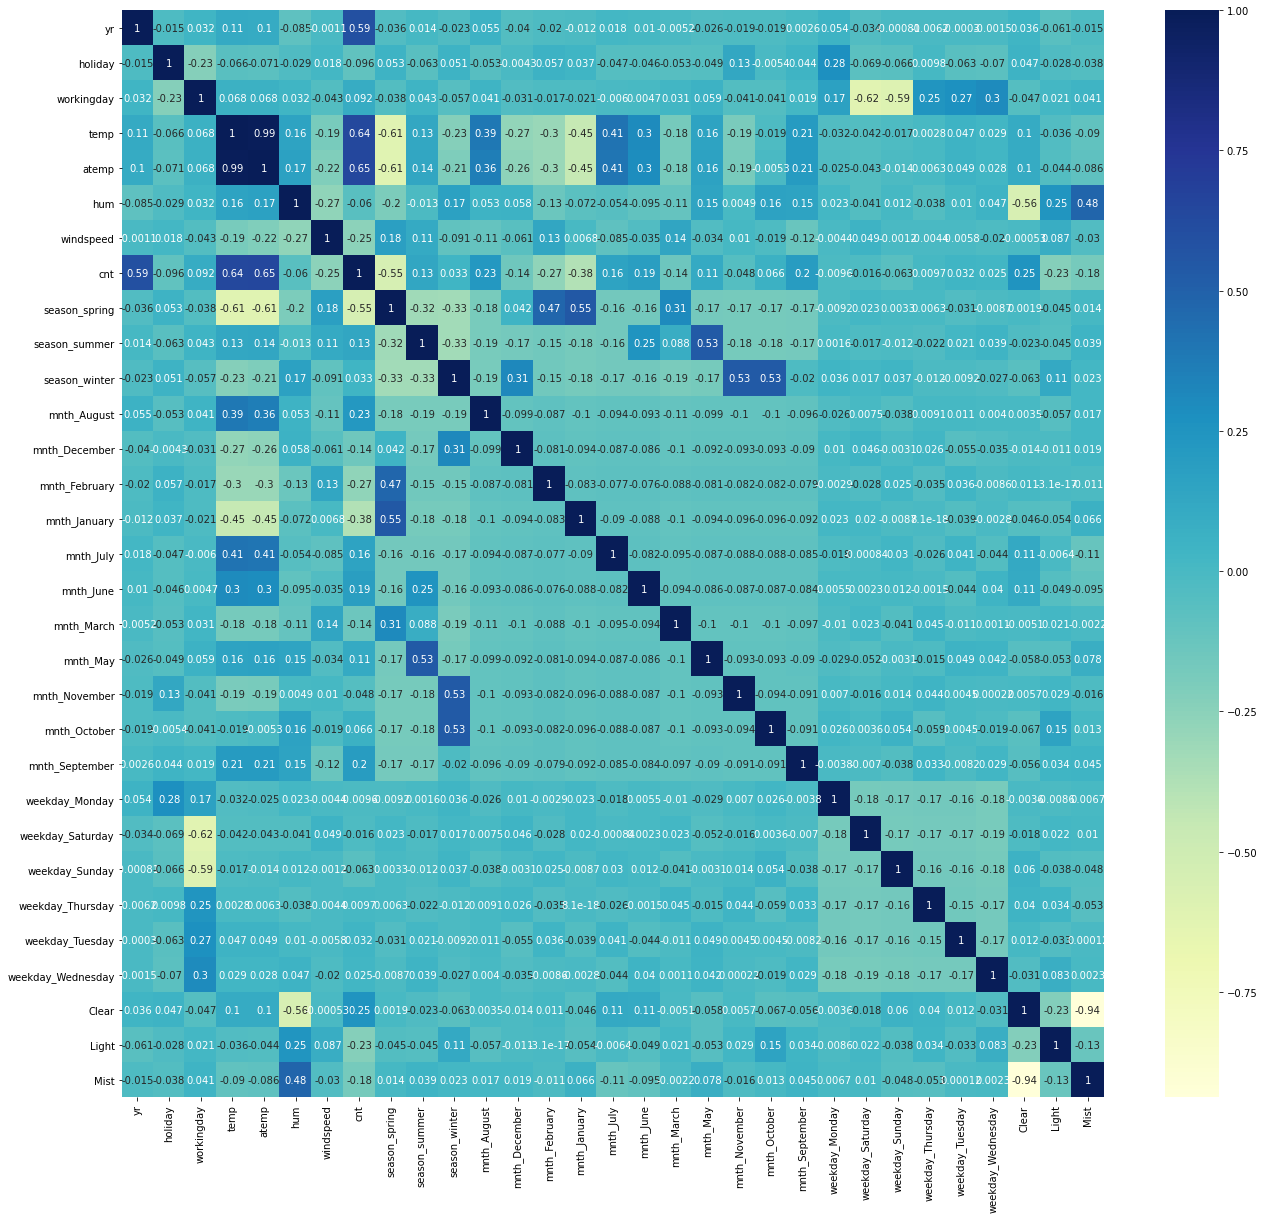

In [46]:
plt.figure(figsize=(22,20))
sns.heatmap(bike_sharing_df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [47]:
# Creating Target variables and Independent variables
y_train = bike_sharing_df_train.pop('cnt')
X_train = bike_sharing_df_train

In [48]:
print(y_train.head(5))

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64


In [49]:
X_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
653,1.0,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,1,0,0
576,1.0,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1.0,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1.0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,1,0,0
482,1.0,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


## Using RFE to build the model

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_August', True, 1),
 ('mnth_December', False, 2),
 ('mnth_February', False, 5),
 ('mnth_January', False, 3),
 ('mnth_July', True, 1),
 ('mnth_June', True, 1),
 ('mnth_March', False, 7),
 ('mnth_May', False, 13),
 ('mnth_November', True, 1),
 ('mnth_October', False, 6),
 ('mnth_September', False, 15),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 16),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 14),
 ('Clear', True, 1),
 ('Light', True, 1),
 ('Mist', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_August', 'mnth_July', 'mnth_June',
       'mnth_November', 'weekday_Saturday', 'Clear', 'Light', 'Mist'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'season_summer', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_March', 'mnth_May', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

In [56]:
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head(5)

,const,yr,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_August,mnth_July,mnth_June,mnth_November,weekday_Saturday,Clear,Light,Mist
653,1.0,1.0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,1,0,0
576,1.0,1.0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0,0
426,1.0,1.0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,0,1
728,1.0,1.0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1.0,1.0,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,0,1


In [57]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [58]:
lm.params

const               0.136350
yr                  0.229183
workingday          0.051080
temp                0.559139
hum                -0.167797
windspeed          -0.185560
season_spring      -0.110686
season_winter       0.058264
mnth_August        -0.063995
mnth_July          -0.125478
mnth_June          -0.054381
mnth_November      -0.033167
weekday_Saturday    0.062907
Clear               0.146531
Light              -0.100221
Mist                0.090039
dtype: float64

In [59]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.67e-190
Time:                        18:17:09   Log-Likelihood:                 513.26
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     495   BIC:                            -933.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1364      0.028  

In [60]:
vif = pd.DataFrame()
vif['Feature']= X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
13,Clear,inf
14,Light,inf
15,Mist,inf
3,temp,3.94
6,season_spring,2.57
7,season_winter,2.15
4,hum,1.96
2,workingday,1.66
12,weekday_Saturday,1.65
9,mnth_July,1.64


In [61]:
X_train_rfe['Clear'].value_counts()

1    320
0    190
Name: Clear, dtype: int64

### Model 2

In [62]:
## Dropping Clear independent variable since it has Infinite VIF
X_train_new = X_train_rfe.drop('Clear', axis=1)

In [63]:
## Building model 2

lm_2 = sm.OLS(y_train,X_train_new).fit()

In [64]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.67e-190
Time:                        18:17:10   Log-Likelihood:                 513.26
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     495   BIC:                            -933.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2829      0.033      8.667      0.000       0.219       0.347
yr                   0.2292      0.008     28.316      0.000       0.213       0.245
workingday           0.0511      0.011      4.672      0.000       0.030       0.073
temp                 0.5591      0.035     15.986      0.000       0.490       0.628
hum                 -0.1678      0.038     -4.398      0.000      -0.243      -0.093
windspeed           -0.1856      0.026     -7.272      0.000      -0.236      -0.135
season_spring       -0.1107      0.015     -7.445      0.000      -0.140      -0.081
season_winter        0.0583      0.013      4.325      0.000       0.032       0.085
mnth_August         -0.0640      0.017     -3.796      0.000      -0.097      -0.031
mnth_July           -0.1255      0.019     -6.542      0.000      -0.163      -0.088
mnth_June           -0.0544      0.018     -3.006      0.003      -0.090      -0.019
mnth_November       -0.0332      0.017     -1.946      0.052      -0.067       0.000
weekday_Saturday     0.0629      0.014      4.458      0.000       0.035       0.091
Light               -0.2468      0.026     -9.393      0.000      -0.298      -0.195
Mist                -0.0565      0.011     -5.376      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       73.144   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.273
Skew:                          -0.723   Prob(JB):                     1.31e-41
Kurtosis:                       5.602   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Feature']= X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
0,const,67.40
3,temp,3.94
6,season_spring,2.57
7,season_winter,2.15
4,hum,1.96
2,workingday,1.66
12,weekday_Saturday,1.65
9,mnth_July,1.64
14,Mist,1.57
8,mnth_August,1.56


### Model 3

In [66]:
## Dropping mnth_November independent variable since it has high  p-value
X_train_new = X_train_new.drop('mnth_November', axis=1)

In [67]:
## Building model 3

lm_3 = sm.OLS(y_train,X_train_new).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.33e-190
Time:                        18:17:10   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2756      0.033      8.476      0.000       0.212       0.339
yr                   0.2292      0.008     28.239      0.000       0.213       0.245
workingday           0.0518      0.011      4.729      0.000       0.030       0.073
temp                 0.5683      0.035     16.351      0.000       0.500       0.637
hum                 -0.1650      0.038     -4.316      0.000      -0.240      -0.090
windspeed           -0.1880      0.026     -7.354      0.000      -0.238      -0.138
season_spring       -0.1077      0.015     -7.263      0.000      -0.137      -0.079
season_winter        0.0479      0.012      3.860      0.000       0.024       0.072
mnth_August         -0.0662      0.017     -3.924      0.000      -0.099      -0.033
mnth_July           -0.1279      0.019     -6.666      0.000      -0.166      -0.090
mnth_June           -0.0559      0.018     -3.086      0.002      -0.092      -0.020
weekday_Saturday     0.0644      0.014      4.555      0.000       0.037       0.092
Light               -0.2453      0.026     -9.315      0.000      -0.297      -0.194
Mist                -0.0562      0.011     -5.337      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       72.644   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.380
Skew:                          -0.719   Prob(JB):                     3.37e-41
Kurtosis:                       5.589   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Feature']= X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
0,const,66.51
3,temp,3.87
6,season_spring,2.55
4,hum,1.95
7,season_winter,1.81
2,workingday,1.65
9,mnth_July,1.64
11,weekday_Saturday,1.64
13,Mist,1.57
8,mnth_August,1.55


In [69]:
col_final = X_train_new.columns
col_final

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_August', 'mnth_July',
       'mnth_June', 'weekday_Saturday', 'Light', 'Mist'],
      dtype='object')

In [70]:
lm_3.params

const               0.275581
yr                  0.229197
workingday          0.051821
temp                0.568294
hum                -0.165028
windspeed          -0.187963
season_spring      -0.107700
season_winter       0.047877
mnth_August        -0.066190
mnth_July          -0.127947
mnth_June          -0.055943
weekday_Saturday    0.064371
Light              -0.245293
Mist               -0.056230
dtype: float64

## Residual Analysis

In [71]:
y_train_pred = lm_3.predict(X_train_new)

In [72]:
res = (y_train-y_train_pred)
res.shape

(510,)

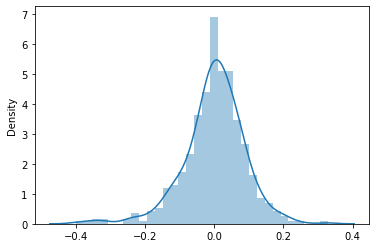

In [73]:
sns.distplot(res)
plt.show()

Text(0, 0.5, 'y_train_pred')

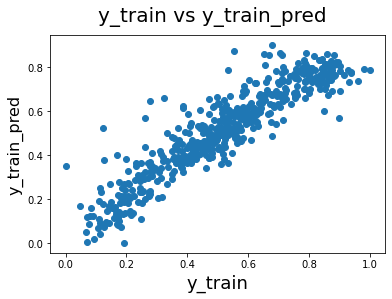

In [74]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label

In [75]:
y_train_pred.head(5)

653    0.742754
576    0.722406
426    0.502983
728    0.329532
482    0.619088
dtype: float64

## Prediction and Evaluation on the test set

In [76]:

num_vars = ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fit and Tranform the data
bike_sharing_df_test[num_vars] = scaler.transform(bike_sharing_df_test[num_vars])
# bike_sharing_df_test = bike_sharing_df_test[num_vars]
bike_sharing_df_test.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
184,0.0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1.0,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,1,1,0,0
299,0.0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0.0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,1,1,0,0
152,0.0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,1,0,0


In [77]:
bike_sharing_df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
y_test = bike_sharing_df_test.pop('cnt')
X_test = bike_sharing_df_test

In [79]:
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [80]:
X_test.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
184,0.0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1.0,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,1,1,0,0
299,0.0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,1,0,0,0,0,1
221,0.0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,1,1,0,0
152,0.0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [81]:
# Add constant to X-test to make prediction

X_test_sm = sm.add_constant(X_test)

In [82]:
X_test_sm.head(5)

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Clear,Light,Mist
184,1.0,0.0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1.0,1.0,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,1,1,0,0
299,1.0,0.0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,1,0,0,0,0,1
221,1.0,0.0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,1,1,0,0
152,1.0,0.0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,1,0,0,1,0,0


In [83]:
X_test_sm = X_test_sm[col_final]

In [84]:
X_test_sm.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_August,mnth_July,mnth_June,weekday_Saturday,Light,Mist
184,1.0,0.0,0,0.831783,0.657364,0.084219,0,0,0,1,0,0,0,1
535,1.0,1.0,1,0.901354,0.610133,0.153728,0,0,0,0,1,0,0,0
299,1.0,0.0,1,0.511964,0.837699,0.334206,0,1,0,0,0,0,0,1
221,1.0,0.0,1,0.881625,0.437098,0.339570,0,0,1,0,0,0,0,0
152,1.0,0.0,1,0.817246,0.314298,0.537414,0,0,0,0,1,0,0,0


In [85]:
# Predict on Test Set
y_test_pred = lm_3.predict(X_test_sm)

In [86]:
y_test_pred.head(10)

184    0.439787
535    0.883305
299    0.408932
221    0.626274
152    0.583012
404    0.437779
198    0.505455
171    0.472439
512    0.790124
200    0.552513
dtype: float64

Text(0, 0.5, 'y_test_pred')

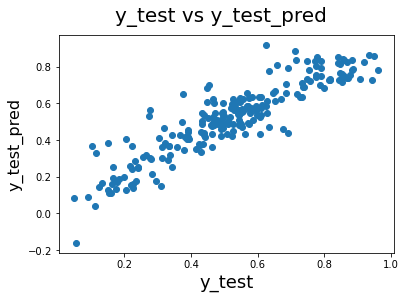

In [87]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [88]:
res_pred = (y_test-y_test_pred)
res_pred.shape

(219,)

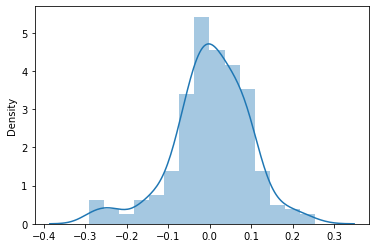

In [89]:
sns.distplot(res_pred)
plt.show()

## Plotting Error Terms

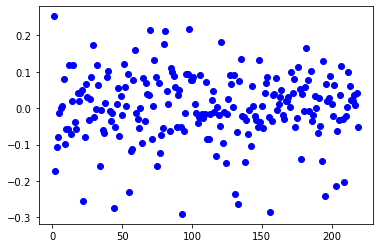

In [90]:
instant = [i for i in range(1,y_test.shape[0]+1)]

plt.scatter(instant, y_test-y_test_pred, color='Blue')
plt.show()



In [91]:
# Evaluate
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8434124875839386
0.8182044312590557
